In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('tables/salaries_2020-2025.csv')

In [2]:
columns_delete=['work_year', 'employment_type', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
df = df.drop(columns=columns_delete)
df = df.drop_duplicates()
df = df.sort_values(by='salary_in_usd', ascending=False)
print(df)

      experience_level                        job_title  salary_in_usd
79867               MI                     AI Architect         800000
13514               EN                    Data Engineer         793136
80710               EN                     Data Analyst         774000
84453               MI                    Data Engineer         750000
81685               MI       Machine Learning Scientist         750000
...                ...                              ...            ...
39495               EN                       BI Analyst          15107
87863               MI  Business Intelligence Developer          15000
90074               EX               Staff Data Analyst          15000
92702               EN       Machine Learning Developer          15000
92999               EN                     Data Analyst          15000

[34299 rows x 3 columns]


In [3]:
df['job_xp'] = df['job_title'] + ' (' + df['experience_level'].astype(str) + ')'
print(df)

      experience_level                        job_title  salary_in_usd  \
79867               MI                     AI Architect         800000   
13514               EN                    Data Engineer         793136   
80710               EN                     Data Analyst         774000   
84453               MI                    Data Engineer         750000   
81685               MI       Machine Learning Scientist         750000   
...                ...                              ...            ...   
39495               EN                       BI Analyst          15107   
87863               MI  Business Intelligence Developer          15000   
90074               EX               Staff Data Analyst          15000   
92702               EN       Machine Learning Developer          15000   
92999               EN                     Data Analyst          15000   

                                     job_xp  
79867                     AI Architect (MI)  
13514              

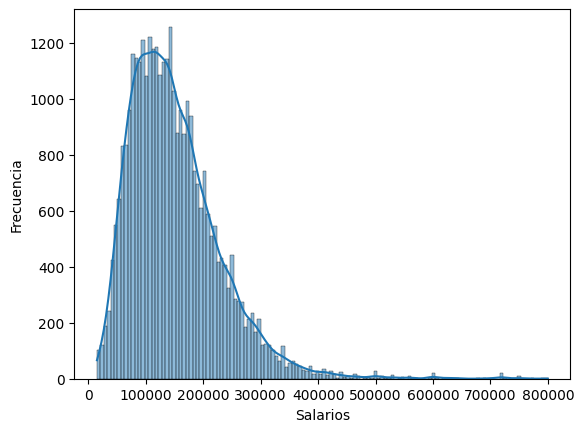

In [4]:
sns.histplot(df['salary_in_usd'], kde=True)

plt.xlabel('Salarios')
plt.ylabel('Frecuencia')

plt.show()

In [5]:
df['log_salary'] = np.log10(df['salary_in_usd'])
log_salary = df['log_salary']

def sturges(data):
    num_data = len(data)
    num_bins = int(np.log2(num_data)) + 1
    return num_bins
def freedman_diaconis(data):
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = int((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins

k1 = sturges(log_salary)
k = freedman_diaconis(log_salary)
print(k1, k)

16 91


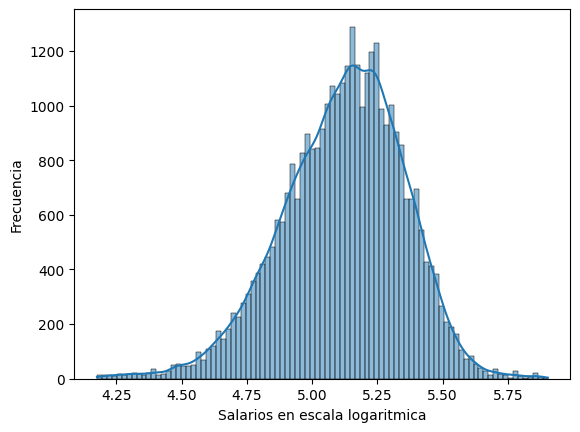

In [7]:
sns.histplot(df['log_salary'], kde=True)

plt.xlabel('Salarios en escala logaritmica')
plt.ylabel('Frecuencia')

plt.show()

In [7]:
k = 128
bins = np.linspace(np.min(log_salary), np.max(log_salary), k+1)
real_bins = 10 ** bins
labels = [f'{np.round(real_bins[i], 2)} to {np.round(real_bins[i+1], 2)}' for i in range(k)]

df['salary'] = pd.cut(log_salary, bins=bins, labels=labels, include_lowest=True)
print(df)

      experience_level                        job_title  salary_in_usd  \
79867               MI                     AI Architect         800000   
13514               EN                    Data Engineer         793136   
80710               EN                     Data Analyst         774000   
84453               MI                    Data Engineer         750000   
81685               MI       Machine Learning Scientist         750000   
...                ...                              ...            ...   
39495               EN                       BI Analyst          15107   
87863               MI  Business Intelligence Developer          15000   
90074               EX               Staff Data Analyst          15000   
92702               EN       Machine Learning Developer          15000   
92999               EN                     Data Analyst          15000   

                                     job_xp  log_salary  \
79867                     AI Architect (MI)    5.903

In [8]:
df = df.drop('experience_level', axis=1)
df = df.drop('job_title', axis=1)
df = df.drop('salary_in_usd', axis=1)
df = df.drop('log_salary', axis=1)
df = df.drop_duplicates()
print(df)

                                     job_xp                  salary
79867                     AI Architect (MI)   775528.58 to 800000.0
13514                    Data Engineer (EN)   775528.58 to 800000.0
80710                     Data Analyst (EN)  751805.73 to 775528.58
84453                    Data Engineer (MI)  728808.54 to 751805.73
81685       Machine Learning Scientist (MI)  728808.54 to 751805.73
...                                     ...                     ...
65822    Software Development Engineer (EN)     15000.0 to 15473.32
39495                       BI Analyst (EN)     15000.0 to 15473.32
87863  Business Intelligence Developer (MI)     15000.0 to 15473.32
90074               Staff Data Analyst (EX)     15000.0 to 15473.32
92702       Machine Learning Developer (EN)     15000.0 to 15473.32

[10582 rows x 2 columns]


In [9]:
df.to_csv('salaries_2020-2025(grouped_log_xp).csv', index = False)